# Face Verification (Siamese Network)
A Siamese Network is a type of neural network architecture used for similarity comparison tasks, particularly in computer vision applications. The name "Siamese" comes from the idea that the network has two identical subnetworks that are joined together.

Here's a brief overview of Siamese Networks:

- **Purpose**: Siamese Networks are used for tasks like face recognition, signature verification, fingerprint matching, and other tasks where you want to measure the similarity or dissimilarity between two input data points.

- **Architecture**: The core of a Siamese Network consists of two identical subnetworks (often convolutional neural networks, or CNNs) that share the same weights and architecture. Each subnetwork processes one of the input data points independently.

- **Training**: During training, Siamese Networks are typically trained on pairs of data points, where you have a positive pair (two similar items) and a negative pair (two dissimilar items). The network learns to minimize the distance between representations of similar items and maximize the distance between representations of dissimilar items.

- **Output**: The output of a Siamese Network is usually a similarity score or a dissimilarity score between the two input data points. Common similarity metrics used include Euclidean distance or cosine similarity.

- **Use Cases**:
  - **Face Recognition**: Determining if two faces belong to the same person.
  - **Signature Verification**: Checking if two signatures were made by the same person.
  - **Object Tracking**: Tracking the movement of objects over time by comparing object representations.

- **Advantages**:
  - Effective for tasks where you have limited labeled data.
  - Can learn good representations even with a small amount of positive and negative pairs.

- **Disadvantages**:
  - Training can be computationally intensive due to the need to compute pairwise distances.
  - Requires careful design and hyperparameter tuning.

Siamese Networks have been used effectively in various applications where measuring similarity or dissimilarity between data points is crucial. They have gained popularity in the field of computer vision and are a valuable tool for many similarity-based tasks.
![image.png](attachment:image.png)

In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 14.3 MB/s eta 0:00:00


In [ ]:
!pip install keras-applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 712.3 kB/s eta 0:00:00


In [ ]:
!pip install keras-vggface

In [ ]:
from mtcnn.mtcnn import MTCNN
import numpy as np
from PIL import Image
from keras.utils.layer_utils import get_source_inputs
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
import tensorflow as tf
# usr/local/lib/python3.7/dist-packages/keras_vggface/models.py

### Capturing image and using it for Face Verification

In [ ]:
import cv2

cap = cv2.VideoCapture(0)  
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

ret, frame = cap.read()

if not ret:
    print("Error: Could not capture a frame.")
else:
    cv2.imwrite('captured_image.jpg', frame)
    print("Image captured and saved as 'captured_image.jpg'.")

cap.release()

cv2.destroyAllWindows()


In [ ]:
D=MTCNN() # to get th e face

In [ ]:
model=VGGFace(model='resnet50',include_top=False,input_shape=(224,224,3),pooling='avg')

94694792/94694792 [==============================] - 4s 0us/step


In [ ]:
P1=Image.open(r'/content/sample_data/Data/pos_1.jpg')
P2=Image.open(r'/content/sample_data/Data/pos_2.jpg')
N1=Image.open(r'/content/sample_data/Data/neg_1.jpg')

In [ ]:
P1

In [ ]:
P2

In [ ]:
N1

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
P1=np.asarray(P1)
P2=np.asarray(P2)
N1=np.asarray(N1)

In [ ]:
#extract faces
def f_getFace(I):
  r=D.detect_faces(I)
  x1,y1,w,h=r[0]['box']
  x2,y2=x1+w,y1+h
  face=I[y1:y2,x1:x2]
  return Image.fromarray(face).resize((224,224))

In [ ]:
f1=f_getFace(P1)
f2=f_getFace(P2)
f3=f_getFace(N1)

1/1 [==============================] - 0s 42ms/step


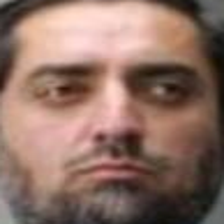

In [ ]:
f1

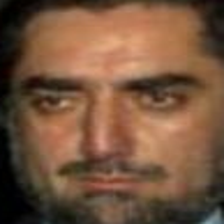

In [ ]:
f2

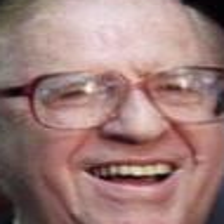

In [ ]:
f3

In [ ]:
f1=np.asarray(f1,'float32')
f2=np.asarray(f2,'float32')
f3=np.asarray(f3,'float32')

In [ ]:
f1 = preprocess_input(f1,version=2)
f2 = preprocess_input(f2,version=2)
f3 = preprocess_input(f3,version=2)


In [ ]:
f1.shape


(224, 224, 3)

In [ ]:
PE1 = model.predict(f1[np.newaxis,...])
PE2 = model.predict(f2[np.newaxis,...])
NE3 = model.predict(f3[np.newaxis,...])

1/1 [==============================] - 0s 249ms/step


In [ ]:
PE1.shape

(1, 2048)

In [ ]:
model.predict?

In [ ]:
distance_pos = np.sum((PE1-PE2)**2)**0.5
distance_neg = np.sum((PE1-NE3)**2)**0.5

In [ ]:
print(distance_pos,distance_neg)


79.26025170285544 142.53252096013037
